# Chapter 10 
 Statistics for Data Science and Analytics<br>
by Peter C. Bruce, Peter Gedeck, Janet F. Dobbins

Publisher: Wiley; 1st edition (2024) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2024 Peter C. Bruce, Peter Gedeck, Janet F. Dobbins

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors. 
"Warnings" are for information only and can usually be ignored. 
"Errors" will stop execution and need to be fixed in order to get results. 

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/sdsa-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Report the problem using the issue tracker at https://github.com/gedeck/sdsa-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

 Load required packages

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

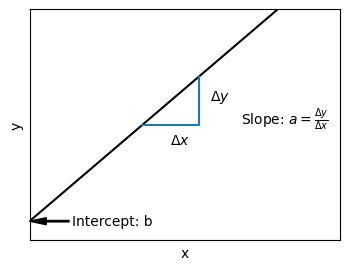

In [3]:
def f(x):
    return 2.5 * x + 1

fig, ax = plt.subplots(figsize=(4, 3))
x = np.array([0, 6])
y = f(x)
ax.plot(x, y, color="black")
ax.plot([2, 3, 3], [f(2), f(2), f(3)])
ax.text(2.5, 5, "$\Delta x$")
ax.text(3.2, 0.5*(f(2)+f(3)), "$\Delta y$")
ax.text(3.75, 6, r"Slope: $a=\frac{\Delta y}{\Delta x}$")
ax.set_xlim(0, 5.5)
ax.set_ylim(0, 12)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
ax.annotate("Intercept: b", xy=(0, 1), xytext=(0.75, 1), va="center",
            arrowprops={"facecolor": "black", "width": 1, "headwidth": 5})
plt.show()

# Example: Baseball payroll

In [4]:
baseball = pd.read_csv("baseball_payroll.csv")
baseball.head()

,Team Name,Average Payroll (Million),Total Wins
0,Yankees,216.10,279
1,Red Sox,146.66,276
2,Mets,127.40,273
3,Dodgers,119.57,254
4,Cubs,115.16,248


 Visualize the dataset

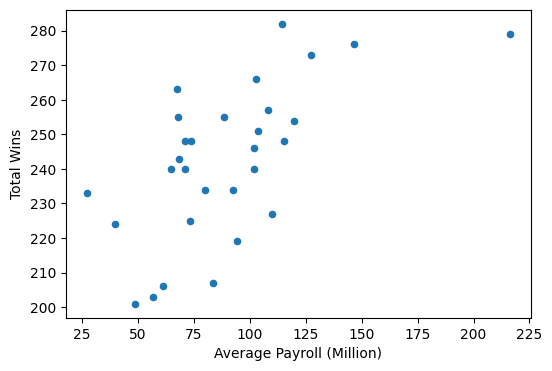

In [5]:
fig, ax = plt.subplots(figsize=(6, 4))
baseball.plot.scatter(x="Average Payroll (Million)", y="Total Wins", ax=ax)

ax.set_xlabel("Average Payroll (Million)")
ax.set_ylabel("Total Wins")
plt.show()

 Visualize the dataset

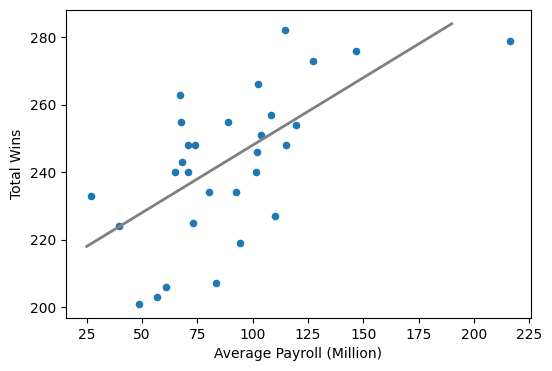

In [6]:
fig, ax = plt.subplots(figsize=(6, 4))
baseball.plot.scatter(x="Average Payroll (Million)", y="Total Wins", ax=ax)

x = np.array([25, 190])
ax.plot(x, 0.4 * x + 208, color="grey", linewidth=2)

ax.set_xlabel("Average Payroll (Million)")
ax.set_ylabel("Total Wins")
plt.show()

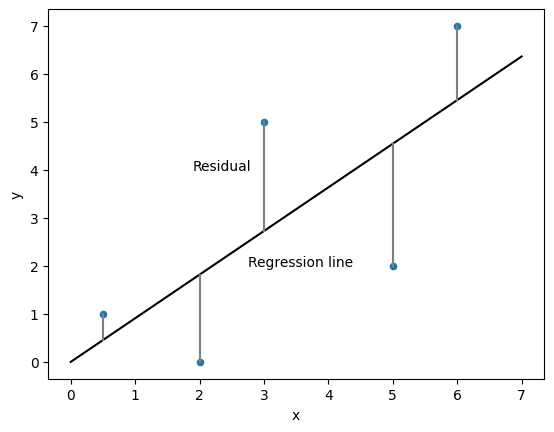

In [7]:
from sklearn.linear_model import LinearRegression

df = pd.DataFrame({
    "x": [0.5, 2, 3, 5, 6],
    "y": [1, 0, 5, 2, 7],
})
model = LinearRegression()
model.fit(df[["x"]].to_numpy(), df["y"].to_numpy())
ax = df.plot.scatter(x="x", y="y", c="C0")
ax.plot([0, 7], model.predict([[0], [7]]), color="black")
for i, row in df.iterrows():
    ax.plot([row["x"], row["x"]],
            [row["y"], model.predict([[row["x"]]])[0]], color="grey")
ax.text(1.9, 4, "Residual")
ax.text(2.75, 2, "Regression line")
plt.show()

# Example: delta-wire linear regression

 Load the data

In [8]:
delta_wire = pd.DataFrame({
    "training": [0, 100, 250, 375, 525, 750, 875, 1100, 1300, 1450, 1660, 1900, 2300, 2600,
                2850, 3150, 3500, 4000],
    "productivity": [70_000, 70_350, 70_500, 72_600, 74_000, 76_500, 77_000, 77_400, 77_900,
                    77_200, 78_900, 81_000, 82_500, 84_000, 86_500, 87_000, 88_600, 90_000],
})

 Example: Delta Wire - Linear regression using scikit-learn

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(delta_wire[["training"]], delta_wire["productivity"])
print(f"Intercept: {model.intercept_:.2f}")
print(f"Slope: {model.coef_[0]:.6f}")

Intercept: 70880.25
Slope: 5.093445


 Visualize the regression line

/Users/petergedeck/git/Wiley-Statistics-for-Data-Science-and-Analytics/.venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


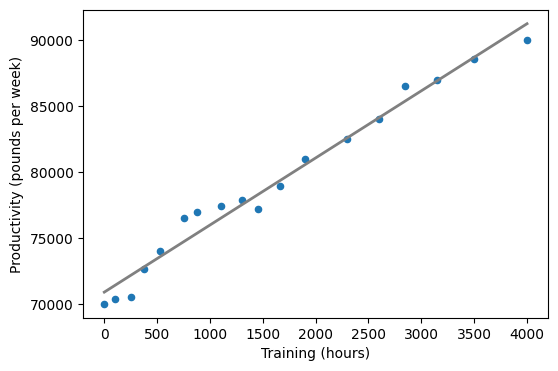

In [10]:
fig, ax = plt.subplots(figsize=(6, 4))
delta_wire.plot.scatter(x="training", y="productivity", ax=ax)
x = np.array([0, 4000])
ax.plot(x, model.predict(x.reshape(-1, 1)), color="grey", linewidth=2)
ax.set_xlabel("Training (hours)")
ax.set_ylabel("Productivity (pounds per week)")
plt.show()

 Example: PEFR - Linear regression using scikit-learn

In [11]:
pefr = pd.read_csv("pefr.txt", sep="\t")
model = LinearRegression()
model.fit(pefr[["exposure"]], pefr["pefr"])
print(f"Intercept: {model.intercept_:.2f}")
print(f"Slope: {model.coef_[0]:.6f}")

Intercept: 424.58
Slope: -4.184576


 Visualize the regression line

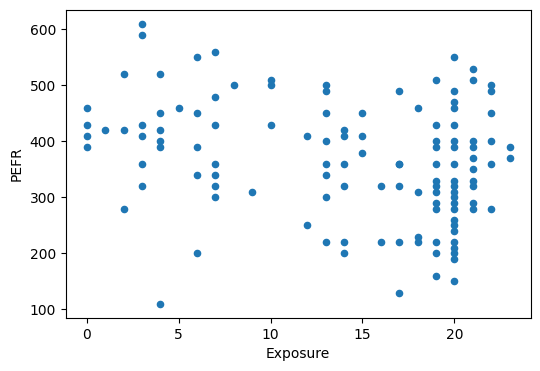

In [12]:
fig, ax = plt.subplots(figsize=(6, 4))
pefr.plot.scatter(x="exposure", y="pefr", ax=ax)
ax.set_xlabel("Exposure")
ax.set_ylabel("PEFR")
plt.show()

/Users/petergedeck/git/Wiley-Statistics-for-Data-Science-and-Analytics/.venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


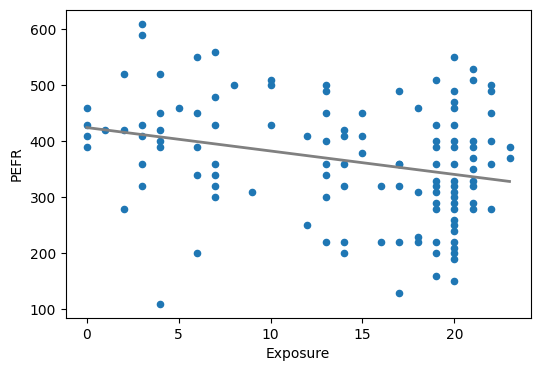

In [13]:
fig, ax = plt.subplots(figsize=(6, 4))
pefr.plot.scatter(x="exposure", y="pefr", ax=ax)
ax.set_xlabel("Exposure")
ax.set_ylabel("PEFR")
x = np.array([0, 23])
ax.plot(x, model.predict(x.reshape(-1, 1)), color="grey", linewidth=2)
plt.show()

# Residual plots - Baseball payroll dataset

 Calculate the residuals

In [14]:
from sklearn.linear_model import LinearRegression
predictor = ["Average Payroll (Million)"]
model = LinearRegression()
model.fit(baseball[predictor], baseball["Total Wins"])
print(f"Intercept: {model.intercept_:.2f}")
print(f"Slope: {model.coef_[0]:.6f}")

baseball["predicted"] = model.predict(baseball[predictor])
baseball["residuals"] = baseball["Total Wins"] - baseball["predicted"]

Intercept: 207.48
Slope: 0.390470


 Visualize the residuals

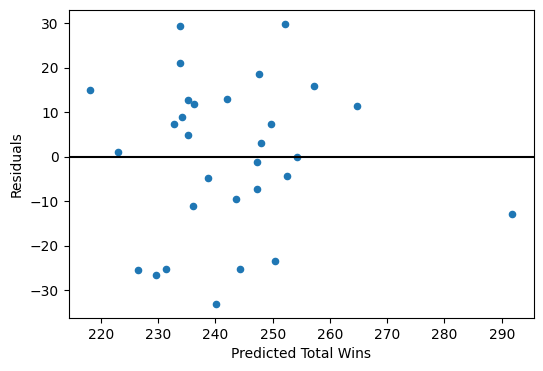

In [15]:
fig, ax = plt.subplots(figsize=(6, 4))
baseball.plot.scatter(x="predicted", y="residuals", ax=ax)
ax.axhline(0, color="black")
ax.set_xlabel("Predicted Total Wins")
ax.set_ylabel("Residuals")
plt.show()

# Residual plots - Delta Wire dataset

 Calculate the residuals

In [16]:
from sklearn.linear_model import LinearRegression
predictors = ["training"]
model = LinearRegression()
model.fit(delta_wire[predictors], delta_wire["productivity"])
delta_wire["predicted"] = model.predict(delta_wire[predictors])
delta_wire["residuals"] = delta_wire["productivity"] - delta_wire["predicted"]

 Visualize the residuals

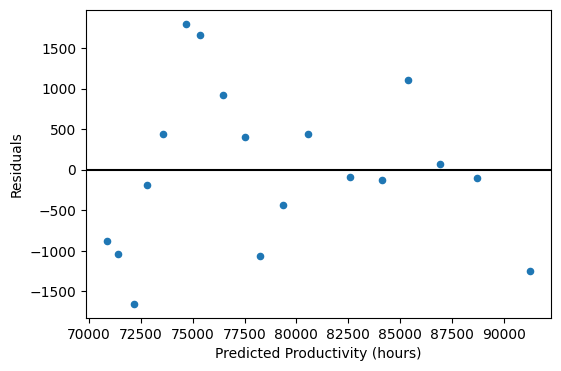

In [17]:
fig, ax = plt.subplots(figsize=(6, 4))
delta_wire.plot.scatter(x="predicted", y="residuals", ax=ax)
ax.axhline(0, color="black")
ax.set_xlabel("Predicted Productivity (hours)")
ax.set_ylabel("Residuals")
plt.show()

# Residual plots - PEFR dataset

 Calculate the residuals

In [18]:
from sklearn.linear_model import LinearRegression
predictors = ["exposure"]
model = LinearRegression()
model.fit(pefr[predictors], pefr["pefr"])
pefr["predicted"] = model.predict(pefr[predictors])
pefr["residuals"] = pefr["pefr"] - pefr["predicted"]

 Visualize the residuals

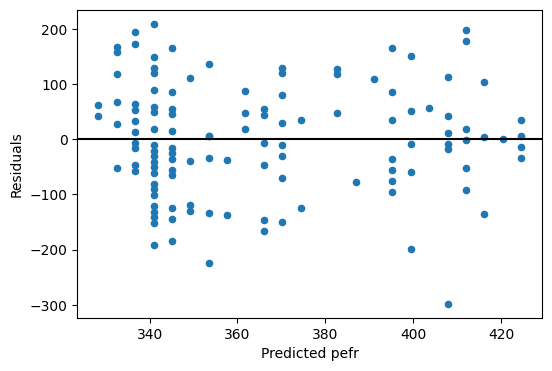

In [19]:
fig, ax = plt.subplots(figsize=(6, 4))
pefr.plot.scatter(x="predicted", y="residuals", ax=ax)
ax.axhline(0, color="black")
ax.set_xlabel("Predicted pefr")
ax.set_ylabel("Residuals")
plt.show()

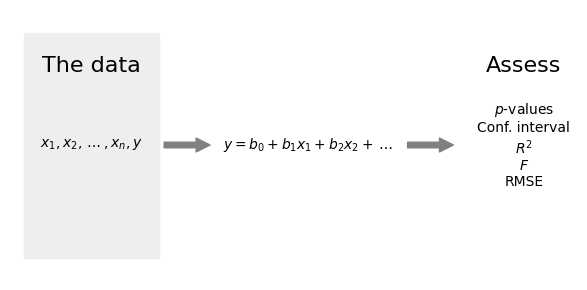

In [20]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrowPatch

def text(ax, xcenter, ycenter, text, va="center", ha="center", **kwargs):
    ax.text(xcenter, ycenter, text, va=va, ha=ha, **kwargs)

def arrow(ax, fromPosition, toPosition, **kwargs):
    arrow = FancyArrowPatch(fromPosition, toPosition, mutation_scale=20, color='grey',
                    **kwargs)
    ax.add_patch(arrow)

def box(ax, xy, width, height, **kwargs):
    kwargs['color'] = kwargs.get('color', 'grey')
    kwargs['fill'] = kwargs.get('fill', False)
    rect = Rectangle(xy, width, height, **kwargs)
    ax.add_patch(rect)

fig, ax = plt.subplots(figsize=[6, 3])

box(ax, (-5, 10), 50, 20, color="#eee", fill=True)
text(ax, 20, 27, "The data", fontsize=16)
text(ax, 20, 20, r"$x_1, x_2, \dots, x_n, y$")

text(ax, 100, 20, r"$y = b_0 + b_1x_1+b_2x_2 + \dots$")

text(ax, 180, 27, "Assess", fontsize=16)
text(ax, 180, 20, "$p$-values\nConf. interval\n$R^2$\n$F$\nRMSE")
arrow(ax, (46, 20), (65, 20))
arrow(ax, (136, 20), (155, 20))

ax.set_xlim(-10, 200)
ax.set_ylim(8, 32)
ax.set_axis_off()
plt.tight_layout()
plt.show()

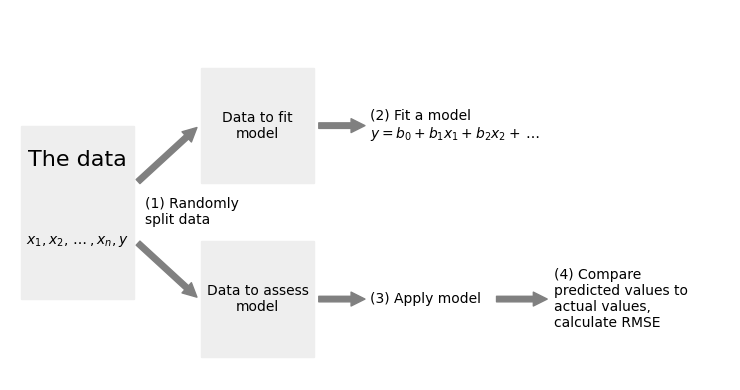

In [21]:
fig, ax = plt.subplots(figsize=[7.5, 4])

box(ax, (-5, 15), 50, 15, color="#eee", fill=True)
text(ax, 20, 27, "The data", fontsize=16)
text(ax, 20, 20, r"$x_1, x_2, \dots, x_n, y$")

box(ax, (75, 25), 50, 10, color="#eee", fill=True)
text(ax, 100, 30, "Data to fit\nmodel")

box(ax, (75, 10), 50, 10, color="#eee", fill=True)
text(ax, 100, 15, "Data to assess\nmodel")

text(ax, 50, 22.5, "(1) Randomly\nsplit data", ha="left")
arrow(ax, (46, 25), (74, 30))
arrow(ax, (46, 20), (74, 15))

text(ax, 150, 30, "(2) Fit a model\n$y = b_0 + b_1x_1+b_2x_2 + \dots$", ha="left")
arrow(ax, (126, 30), (149, 30))
text(ax, 150, 15, "(3) Apply model", ha="left")
arrow(ax, (126, 15), (149, 15))
text(ax, 232, 15, "(4) Compare\npredicted values to\nactual values,\ncalculate RMSE", ha="left")
arrow(ax, (205, 15), (230, 15))

ax.set_xlim(-10, 310)
ax.set_ylim(8, 40)
ax.set_axis_off()
plt.tight_layout()
plt.show()